###Importation des librairies

In [1]:

from sklearn.cluster import Birch
from sklearn import metrics
import numpy as np
import pandas as pd


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



###Chargement des données

In [2]:
df = pd.read_csv("./DataSet/marketing_campaign.csv",sep=";")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,88,546,172,88,88,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,1,6,2,1,6,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,49,127,111,21,42,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,4,20,10,3,5,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,43,118,46,27,15,5,3,6,5,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,5.316518,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,2.426645,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,20.000000,1.000000


###Prétraitement des données

Vérifier si une colonne contient au moins une valeur manquante.


In [5]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Complain               False
dtype: bool

La colonne "Income" contient des valeurs aberrantes, donc il faut une valeur plus petite que 600000 pour compléter les valeurs manquantes.

In [6]:
df = df[(df["Income"]<600000)]
corrmat= df.corr()

De plus, on s'assure de transformer toutes les variables nominales en variables numériques.

In [7]:
le = preprocessing.LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])



Nous allons supprimer les deux colonnes "ID" et "Dt_customer".

In [8]:
df.drop(["ID","Dt_Customer"], axis = 1, inplace = True)

Nous allons créer une nouvelle colonne "Spent" pour estimer la somme de tous les produits achétés par chaque client.

In [9]:
df["Spent"] = df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [10]:
df['Age']= 2022-df['Year_Birth']

In [11]:
df['Child']=df['Kidhome']+df['Teenhome']

In [12]:
df.isna().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Complain               False
Spent                  False
Age                    False
Child                  False
dtype: bool

Maintenant que toutes les valeurs ne sont plus aberrantes, nous pouvons passer au "scaling" afin de pouvoir appliquer l'algorithme de clustering Mean Shift.

In [13]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Spent,Age,Child
0,-0.986016,-0.350616,0.254775,0.286604,-0.822585,-0.929363,0.310113,1.548973,1.689714,2.453932,1.484340,0.849633,1.428103,2.504074,-0.554500,0.693215,-0.097834,2.013985,0.986016,-1.264487
1,-1.236344,-0.350616,0.254775,-0.261407,1.040427,0.908618,-0.380899,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-1.125846,-0.571253,-1.169839,-0.131420,-0.097834,-0.847463,1.236344,1.405522
2,-0.318476,-0.350616,1.182943,0.912723,-0.822585,-0.929363,-0.795506,0.568903,-0.178646,1.339745,-0.147087,-0.038210,1.428103,-0.229550,1.291518,-0.543738,-0.097834,0.141899,0.318476,-1.264487
3,1.266933,-0.350616,1.182943,-1.176680,1.040427,-0.929363,-0.795506,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.760996,-0.912956,-0.554500,0.280897,-0.097834,-0.770447,-1.266933,0.070517
4,1.016605,1.428570,-0.673393,0.293806,1.040427,-0.929363,1.553934,0.418123,-0.218777,0.152497,-0.000989,-0.559335,0.333553,0.112153,0.060839,-0.131420,-0.097834,-0.157279,-1.016605,0.070517


###Application de l'algorithme de clustering : Mean Shift

Dans cette partie, nous allons appliquer l'algorithme  Barch sur les données que nous avons déjà prétraité.

In [14]:
birch = Birch()
model = birch.fit(df_scale)

Définir le nombre de clusters

In [15]:
labels = model.labels_
data_length = len(np.unique(labels))
print("le nombre de clusters est :", data_length)

le nombre de clusters est : 3


In [16]:
pred=model.predict(df_scale)
df['Clusters'] = pred + 1
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Spent,Age,Child,Clusters
0,1957,2,4,58138.0,0,0,58,88,546,172,...,88,8,10,4,7,0,982,65,0,3
1,1954,2,4,46344.0,1,1,38,1,6,2,...,6,1,1,2,5,0,16,68,2,1
2,1965,2,5,71613.0,0,0,26,49,127,111,...,42,8,2,10,4,0,350,57,0,3
3,1984,2,5,26646.0,1,0,26,4,20,10,...,5,2,0,4,6,0,42,38,1,1
4,1981,4,3,58293.0,1,0,94,43,118,46,...,15,5,3,6,5,0,249,41,1,1


###Distribution des clusters

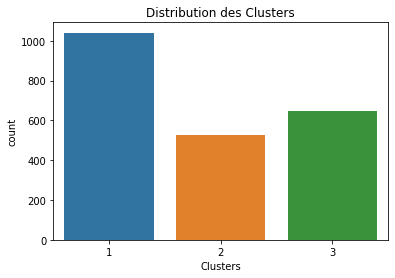

In [17]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution des Clusters")
plt.show()

Nous remarquons donc que les clusters sont bien répartis.

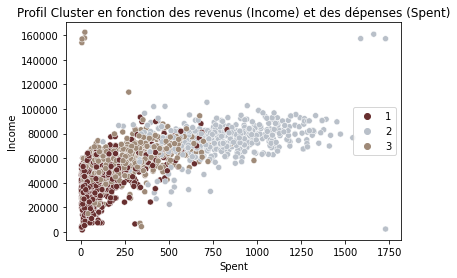

In [18]:
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Profil Cluster en fonction des revenus (Income) et des dépenses (Spent)")
plt.legend()
plt.show()

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling

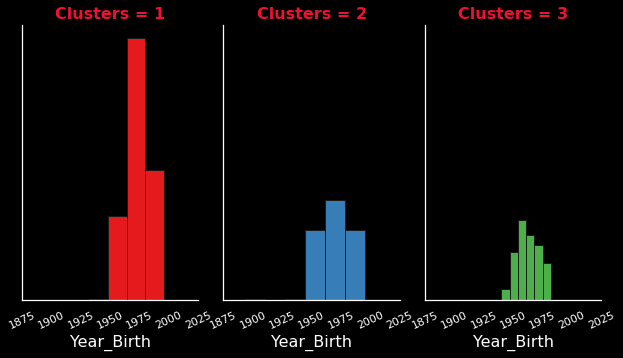

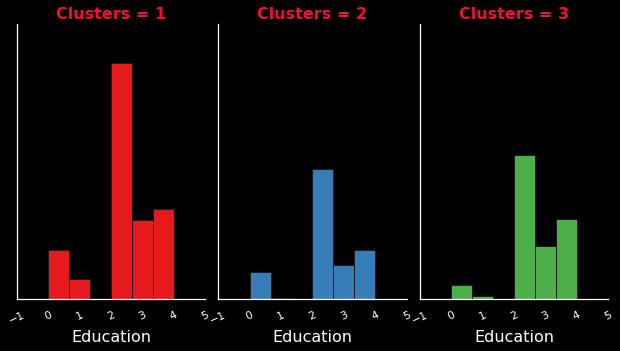

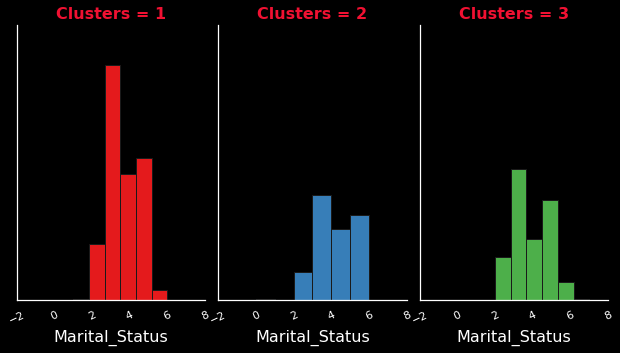

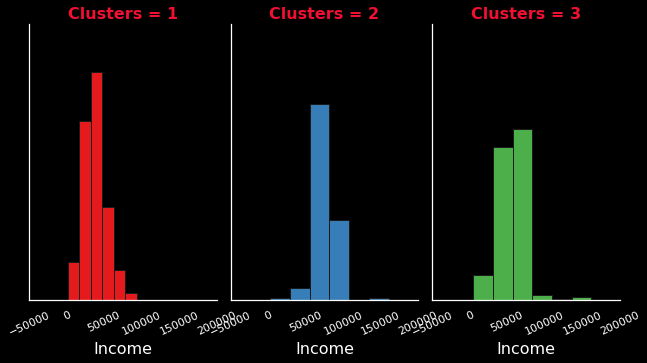

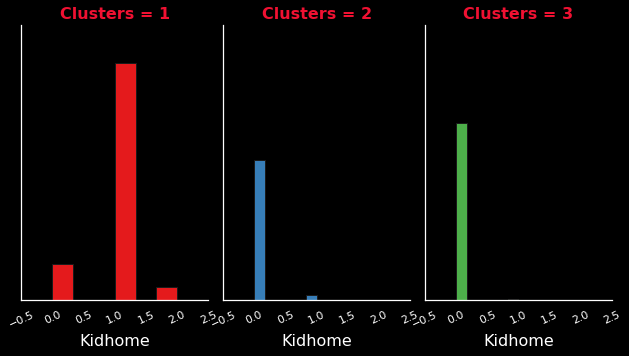

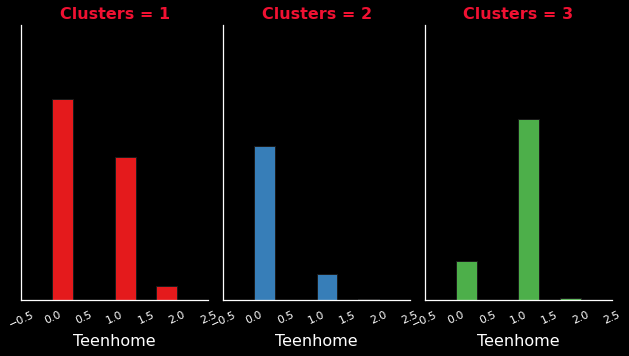

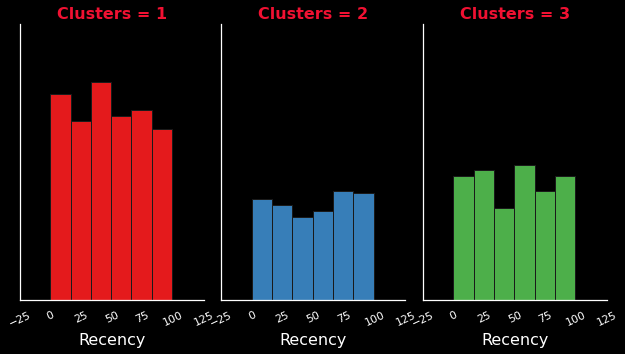

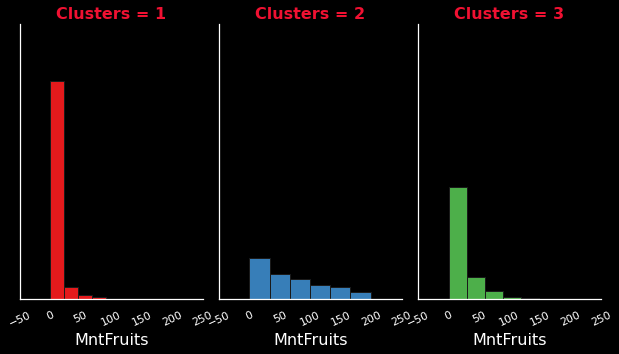

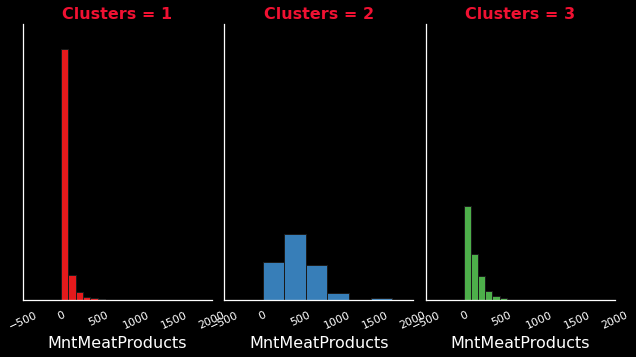

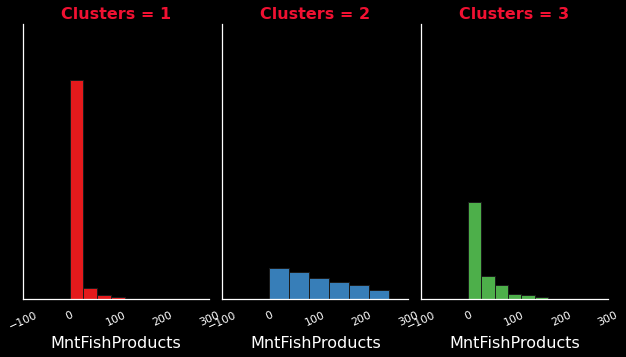

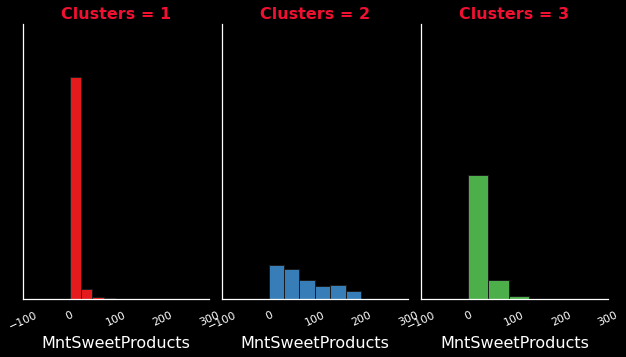

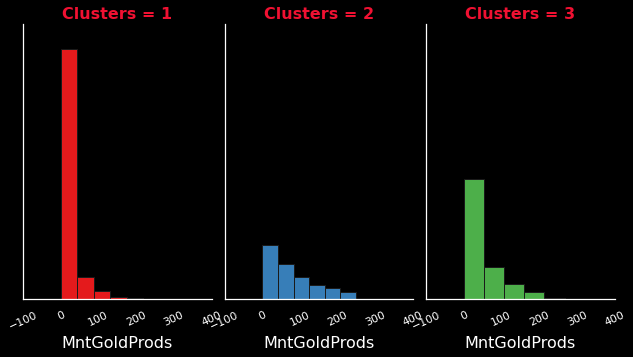

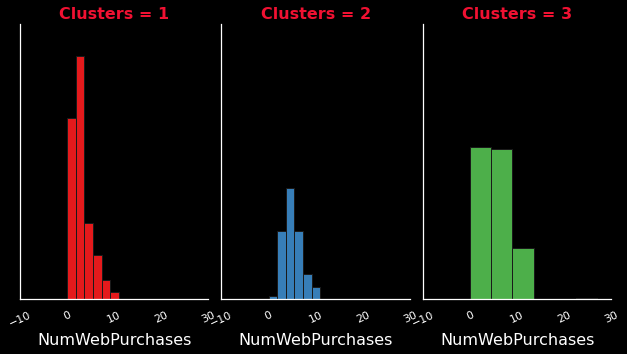

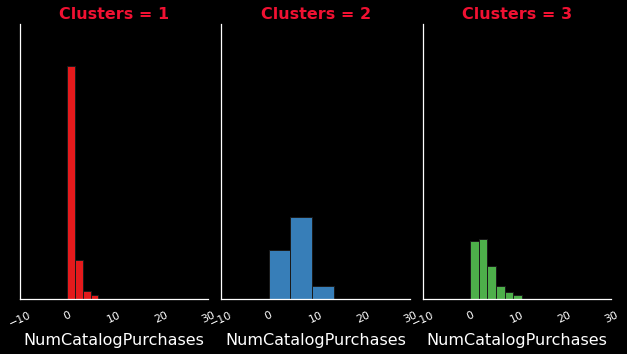

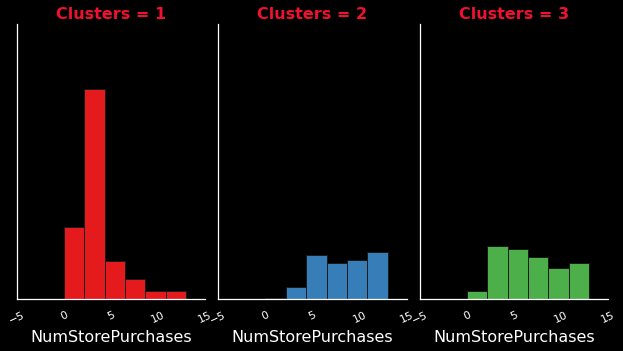

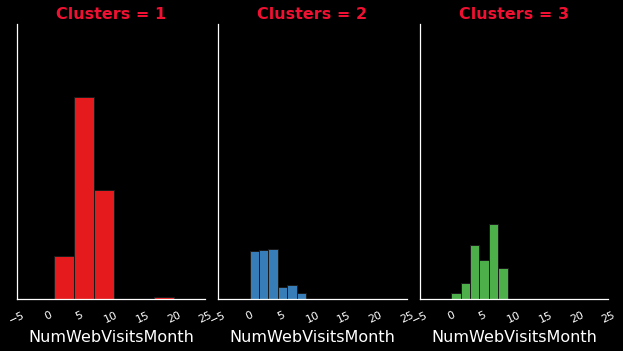

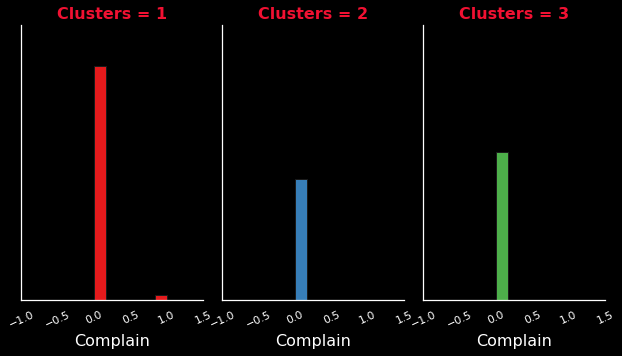

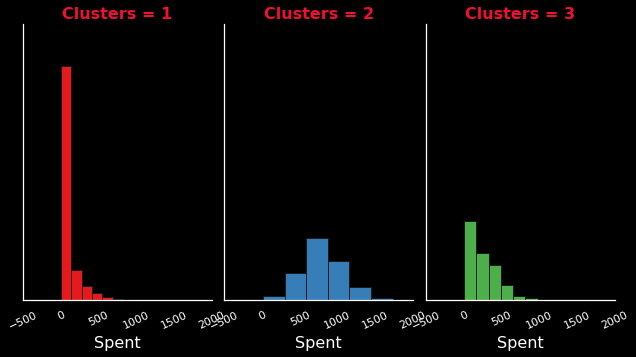

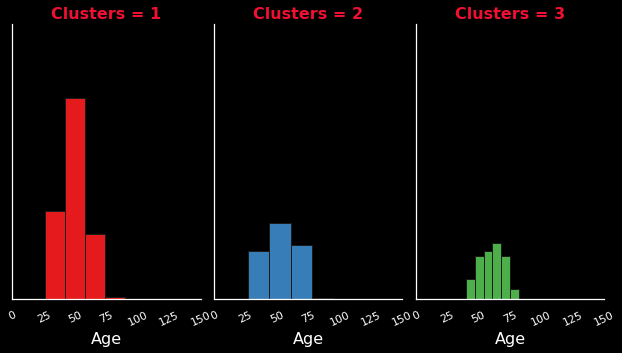

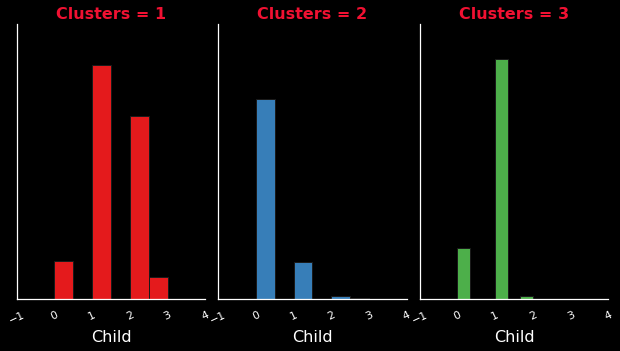

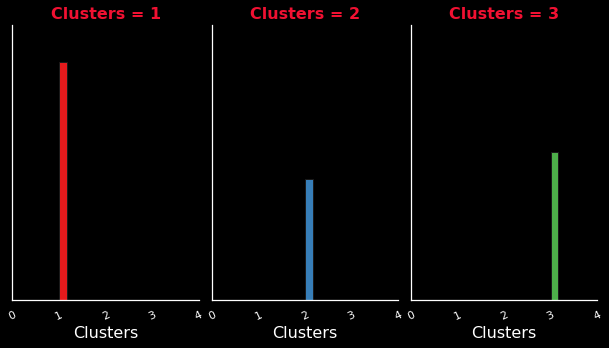

In [20]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "Clusters", hue = "Clusters", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

###Métriques

In [22]:
y_hat = birch.predict(X_scale)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
labels = birch.labels_

In [22]:
algorithms = []
algorithms.append(model)

Calcul du coefiicient de silhouette

In [27]:
metrics.silhouette_score(X_scale, labels, metric = 'euclidean')

0.15289237663959454

Calcul du score CH

In [25]:
metrics.calinski_harabasz_score(X_scale, labels)

506.18725252150415